In [1]:
# https://www.youtube.com/watch?v=0RPFWZj7Jm0&list=PLOFEBzvs-VvrhKYASly1BXo1AdPyoCsor&index=4
mylist = [1,3,5,6,7,8,2,3,0,9,4,1,5,6,7,8]

In [6]:
def oracle(my_input):
    winner=7
    if my_input is winner:
        response = True
    else:
        response = False
    return response

In [9]:
for index, trial_number in enumerate(mylist):
    if oracle(trial_number) is True:
        print('Winner at index %i' %index)
        print('%i calls to oracle used' %(index+1))
        #break

Winner at index 4
5 calls to oracle used
Winner at index 14
15 calls to oracle used


In [10]:
from qiskit import *
import matplotlib.pyplot as plt
import numpy as np

In [11]:
oracle = QuantumCircuit(2,name='oracle')
oracle.cz(0,1)
oracle.to_gate()
oracle.draw()

q_0: ─■─
      │ 
q_1: ─■─

In [13]:
backend = Aer.get_backend('statevector_simulator')
grover_circ = QuantumCircuit(2,2)
grover_circ.h([0,1])
grover_circ.append(oracle,[0,1])
grover_circ.draw()

┌───┐┌─────────┐
q_0: ┤ H ├┤0        ├
     ├───┤│  oracle │
q_1: ┤ H ├┤1        ├
     └───┘└─────────┘
c: 2/════════════════

In [14]:
job = execute(grover_circ,backend)
result = job.result()

In [15]:
sv = result.get_statevector()
np.around(sv,2)

array([ 0.5+0.j,  0.5+0.j,  0.5+0.j, -0.5+0.j])

In [16]:
reflection = QuantumCircuit(2,name='reflection')
reflection.h([0,1])
reflection.z([0,1])
reflection.cz(0,1)
reflection.h([0,1])
reflection.to_gate()

Instruction(name='reflection', num_qubits=2, num_clbits=0, params=[])

In [17]:
reflection.draw()

┌───┐┌───┐   ┌───┐
q_0: ┤ H ├┤ Z ├─■─┤ H ├
     ├───┤├───┤ │ ├───┤
q_1: ┤ H ├┤ Z ├─■─┤ H ├
     └───┘└───┘   └───┘

In [18]:
backend = Aer.get_backend('qasm_simulator')
grover_circ = QuantumCircuit(2,2)
grover_circ.h([0,1])
grover_circ.append(oracle,[0,1])
grover_circ.append(reflection,[0,1])
grover_circ.measure([0,1],[0,1])

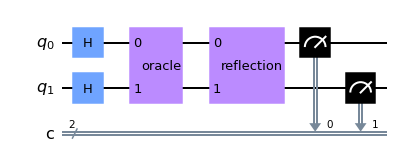

In [27]:
%matplotlib inline
grover_circ.draw(output='mpl')

In [22]:
job = execute(grover_circ,backend,shots=1024)
result = job.result()
result.get_counts()

{'11': 1024}

In [31]:
#IBMQ.load_account()
provider=IBMQ.get_provider(hub='ibm-q')
qcomp=provider.get_backend('ibmq_manila')
job=execute(grover_circ,
            backend=qcomp,
            shots=1024)
print(job.job_id())
from qiskit.tools.monitor import job_monitor
job_monitor(job)

62befb99d8e29d40e020b8b3
Job Status: job has successfully run


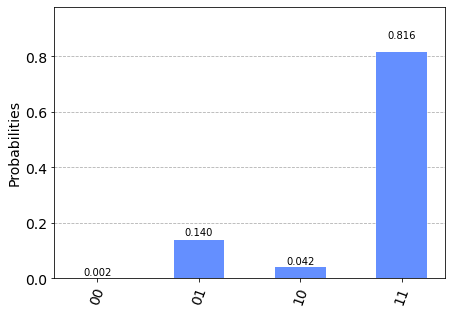

In [32]:
from qiskit.tools.visualization import plot_histogram
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

In [33]:
print(counts)

{'00': 2, '01': 143, '10': 43, '11': 836}


In [34]:
import qiskit.tools.jupyter
%qiskit_copyright